In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

In [2]:
filter_bands = [
    (0, 1061.8895820580437),
    (1061.8895820580437, 6291.0515944125455),
    (6291.0515944125455, 8414.830758528633),
    (8414.830758528633, 13643.992770883133),
    (13643.992770883133, 15767.771934999222),
    (15767.771934999222, 20996.933947353722),
    (20996.933947353722, 23120.71311146981),
]

In [3]:
fs = 48000
num_taps = 128

In [4]:
filter_firs = []

for band in filter_bands:
    low, high = band
    if low == 0:
        fir = signal.firwin(num_taps, high, fs=fs, pass_zero=True)
    elif high >= fs / 2:
        fir = signal.firwin(num_taps, low, fs=fs, pass_zero=False)
    else:
        fir = signal.firwin(num_taps, [low, high], fs=fs, pass_zero=False)
    
    filter_firs.append(fir)

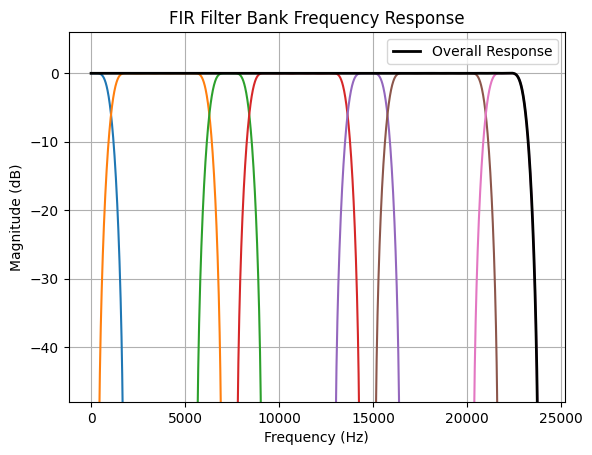

In [5]:
overall_response = None

for i, fir in enumerate(filter_firs):
    w, h = signal.freqz(fir, worN=2000, fs=fs)
    # plt.plot(w, 20 * np.log10(abs(h)), label=f'Band {i+1}: {filter_bands[i]} Hz')
    plt.plot(w, 20 * np.log10(abs(h)))
    if overall_response is None:
        overall_response = h
    else:
        overall_response += h

plt.plot(w, 20 * np.log10(np.abs(overall_response) + 1e-10), 'k', linewidth=2, label='Overall Response')
plt.title('FIR Filter Bank Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.ylim(-48, 6)
plt.legend()
plt.grid()
plt.show()